# OUTPUT TRACKING ALGORITHM


---
Author: **Helvecio B. Leal Neto** & **Alan J. P. Calheiros**\
**National Institute for Space Research - Brazil - (2021)**



## About

This notebook is designed for viewing the tracking results of the storm/precipitation tracking algorithm beta version. The results presented here refer to the tracking of clusters via radar data provided by the GoAmazon project, for the following periods:

**Start**: 2014-09-07 00:00:00

**End**: 2014-09-09 00:00:00

The tracking threshold is:

* **20** dBZ
* inner 1 - ***35*** dBZ
* inner 2 - ***40*** dBZ

Minimum size threshold per cluster:

* **30** pixels
* inner 1 - ***15*** pixels
* inner 2 - ***10*** pixels

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")
import stanalyzer as sta

In [2]:
track_frame = sta.read_file('../output/tracking_compressed.pkl')

In [3]:
track_frame.head()

timestamp  time  uid  id_t       lat        lon     p0  \
Fam_0  0   2014-09-07 00:00:00     0    0     2 -3.866008 -58.262753  216.0   
       10  2014-09-07 00:12:00     1    0     3 -3.884098 -58.334747  212.0   
Fam_1  1   2014-09-07 00:00:00     0    1     5 -3.759429 -59.199203  164.0   
       11  2014-09-07 00:12:00     1    1     4 -3.795402 -59.253189  161.0   
Fam_10 20  2014-09-07 00:24:00     2   10     8 -3.668817 -58.515167  202.0   

             p1  size_20  mean_ref_20  ...  \
Fam_0  0   80.0     66.0    35.540233  ...   
       10  79.0     34.0    26.850009  ...   
Fam_1  1   86.0     75.0    39.058735  ...   
       11  84.0     41.0    37.308171  ...   
Fam_10 20  91.0     82.0    38.440909  ...   

                                                  trajectory  \
Fam_0  0                            GEOMETRYCOLLECTION EMPTY   
       10  LINESTRING (-58.26275253295898 -3.866008281707...   
Fam_1  1                            GEOMETRYCOLLECTION EMPTY   
       11  LINESTRING (-59.19920349121094 -3.759428739547...   
Fam_10 20  LINESTRING (-58.40708923339844 -3.704577922821...   

                                                   vector_20  \
Fam_0  0                            GEOMETRYCOLLECTION EMPTY   
       10  LINESTRING (-58.26275253295898 -3.866008281707...   
Fam_1  1                            GEOMETRYCOLLECTION EMPTY   
       11  LINESTRING (-59.19920349121094 -3.759428739547...   
Fam_10 20  LINESTRING (-58.40708923339844 -3.704577922821...   

                          vector_35                 vector_40  dsize_20  \
Fam_0  0   GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY       NaN   
       10  GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY     -32.0   
Fam_1  1   GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY       NaN   
       11  GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY     -34.0   
Fam_10 20  GEOMETRYCOLLECTION EMPTY  GEOMETRYCOLLECTION EMPTY       NaN   

           dmean_ref_20  dtotal_size_35  dmean_total_ref_35  dtotal_size_40  \
Fam_0  0            NaN             NaN                 NaN             NaN   
       10     -8.690224             NaN                 NaN             NaN   
Fam_1  1            NaN             NaN                 NaN             NaN   
       11     -1.750565            -9.0           -2.209392            -3.0   
Fam_10 20           NaN             NaN                 NaN             NaN   

           dmean_total_ref_40  
Fam_0  0                  NaN  
       10                 NaN  
Fam_1  1                  NaN  
       11           -3.066082  
Fam_10 20                 NaN  

[5 rows x 43 columns]

In [4]:
## This function returns the duration of events
lifes = sta.life_cicle(track_frame,sort=True)
lifes

,uid,times,begin,end,duration
56,182,51,2014-09-08 14:24:00,2014-09-09 00:24:00,0 days 10:00:00
288,68,31,2014-09-07 17:24:00,2014-09-07 23:24:00,0 days 06:00:00
23,13,30,2014-09-07 01:12:00,2014-09-07 07:00:00,0 days 05:48:00
244,414,28,2014-09-08 06:36:00,2014-09-08 12:00:00,0 days 05:24:00
57,183,27,2014-09-08 14:36:00,2014-09-08 19:48:00,0 days 05:12:00
...,...,...,...,...,...
197,367,2,2014-09-09 10:12:00,2014-09-09 10:24:00,0 days 00:12:00
198,368,2,2014-09-09 10:24:00,2014-09-09 10:36:00,0 days 00:12:00
199,369,2,2014-09-09 10:36:00,2014-09-09 10:48:00,0 days 00:12:00
201,370,2,2014-09-09 10:48:00,2014-09-09 11:00:00,0 days 00:12:00


In [5]:
### Filter by time
TIME_MIN = 0
TIME_MAX = 15
UNIT = 'h'

In [6]:
## Apply filter by time
df_filter1 = sta.time_filter(track_frame,TIME_MIN,TIME_MAX,UNIT)

In [7]:
sta.life_cicle(df_filter1,sort=True)

,uid,times,begin,end,duration
56,182,51,2014-09-08 14:24:00,2014-09-09 00:24:00,0 days 10:00:00
287,68,31,2014-09-07 17:24:00,2014-09-07 23:24:00,0 days 06:00:00
23,13,30,2014-09-07 01:12:00,2014-09-07 07:00:00,0 days 05:48:00
243,414,28,2014-09-08 06:36:00,2014-09-08 12:00:00,0 days 05:24:00
72,205,27,2014-09-08 16:00:00,2014-09-08 21:12:00,0 days 05:12:00
...,...,...,...,...,...
196,367,2,2014-09-09 10:12:00,2014-09-09 10:24:00,0 days 00:12:00
197,368,2,2014-09-09 10:24:00,2014-09-09 10:36:00,0 days 00:12:00
198,369,2,2014-09-09 10:36:00,2014-09-09 10:48:00,0 days 00:12:00
200,370,2,2014-09-09 10:48:00,2014-09-09 11:00:00,0 days 00:12:00


In [8]:
## PLOT CONFIG
VAR = "DBZc"
LEVEL = 5


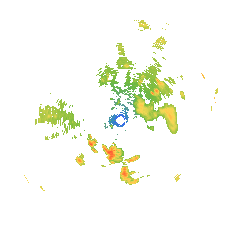
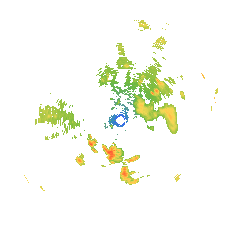
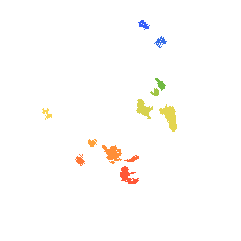
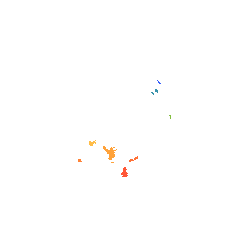
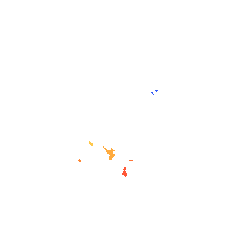
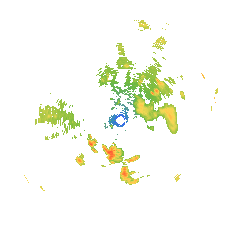
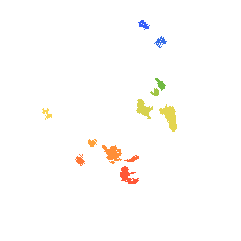
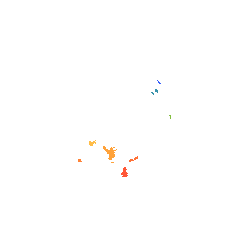
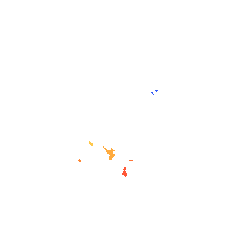
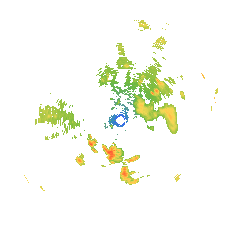
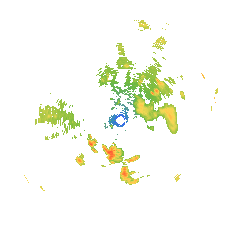
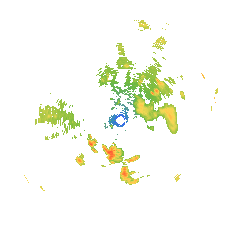
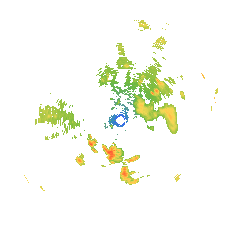

In [61]:
sta.track(df_filter1.query('uid == 13 and time == 10'),var=VAR,level=LEVEL)

In [60]:
wind_df = sta.plot_wind(df_filter1.query('uid == 13 and time == 10'),style='scatter')

In [64]:
wind_df = sta.plot_wind(df_filter1.query('uid == 13 and time <= 10'),style='bar')

In [65]:
wind_df

,uid,direction,strength,velocity,timestamp
1,13,186.322843,40-50 km/h,41.001912,2014-09-07 01:12:00
0,13,175.314782,20-30 km/h,28.861064,2014-09-07 01:24:00
4,13,189.120035,50-60 km/h,51.141591,2014-09-07 01:36:00
3,13,192.558225,40-50 km/h,45.540673,2014-09-07 01:48:00
2,13,195.536389,40-50 km/h,42.375233,2014-09-07 02:00:00
